In [92]:
from ipywidgets import widgets
from ipywidgets import Layout
from IPython import display
import numpy as np
import serial
import time
import sys
import glob
import io

def serial_ports():
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(256)]
    elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
        # this excludes your current terminal "/dev/tty"
        ports = glob.glob('/dev/tty[A-Za-z]*')
    elif sys.platform.startswith('darwin'):
        ports = glob.glob('/dev/tty.*')
    else:
        raise EnvironmentError('Unsupported platform')

    result = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            result.append(port)
        except (OSError, serial.SerialException):
            pass
    return result

def send_printer(cmd='', show=False):
    global ser_p
    ser_p.write(cmd)
    #print cmd
    out = b''
    while ser_p.inWaiting() > 0:
        out += ser_p.read(1)
    if out != '':
        if show:
            print (out)
    return out

def read_scale(n):
    ser_s.reset_input_buffer()
    res=[ser_s.readline() for i in range(n)]
    return [float(res[i].decode()) for i in range(len(res))]

def read_scale_times(t_s=1.):
    res=[]
    res_t=[]
    ser_s.reset_input_buffer()
    start = time.time()

    while (time.time()-start<=t_s):
        res.append(ser_s.readline())
        res_t.append(time.time()-start)
    res=[float(res[i].decode()) for i in range(len(res))]
    
    return res,res_t
    
sports=serial_ports()
#ser_p = serial.Serial(sports[0], baudrate=115200) #3d printer
ser_s = serial.Serial(sports[0], baudrate=115200, timeout=5)  #scale
sio_s = io.TextIOWrapper(io.BufferedRWPair(ser_s, ser_s),newline='\r\n')

#send_printer(b'M203 Z20\r\n',show=True) #increase maximum feedrate for z-axis
#send_printer(b'G91\r\n',show=True) #relative positioning
#send_printer(b'M107\r\n',show=True) #fan off is needed

#for i in range (2):
#    send_printer(b'G0 F2000 Z10\r\n',show=True)
#    send_printer(b'G0 F2000 Z-10\r\n',show=True)
    


CPU times: user 337 ms, sys: 234 ms, total: 571 ms
Wall time: 10 s
938


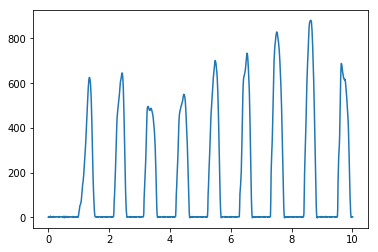

In [102]:
import matplotlib.pyplot as plt

%time y,x=read_scale_times(10)
plt.plot(x,y);
print(len(y))


CPU times: user 34.6 ms, sys: 23.4 ms, total: 58 ms
Wall time: 1.06 s


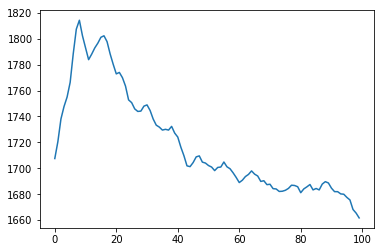

In [82]:
import matplotlib.pyplot as plt

%time s=read_scale(100)
plt.plot(s)

In [73]:
len(s)

10

In [58]:
ser_s.close()

In [69]:
ser_s.reset_input_buffer()
res=sio_s.readlines(10)

In [80]:
len(s)

100

In [84]:
l=time.time()

In [85]:
time.time()-l

11.62539029121399

In [ ]:
938/10